# **Project: Breakthrough**



```
                                              - by G Sai Nikhil and Anish Borkar
```



**What is Breakthrough?**

Breakthrough is a two-player strategy board game that combines elements of chess and traditional war games. The game is played on an 8x8 square board, like a chessboard. Each player has 2 rows of pawns, 'P' for the player and 'p' for the AI, and the objective is to advance a pawn to the opponent's home row while capturing or blocking the opponent's pawns. The game involves strategic moves, capturing opponents, special moves like en passant, and planning to defeat the opponent.

**Objectives:**

1. The main objective is to implement an AI player using reinforcement learning that
learns to play Breakthrough effectively.
2. Train the AI to understand effective strategies such as moving closer to the player's
home row, capturing player pawns, and blocking the player's progress.
3. Teach the AI to utilize special moves like en passant, enhancing its ability to defeat the
player.


**Gameplay Mechanics:**

* **Starting Position:** Breakthrough begins with an 8x8 game board, with each player
starting with 16 pawns placed on the two rows closest to them. The pawns are represented
by 'black' for the AI player and ‘white’ for the human player.

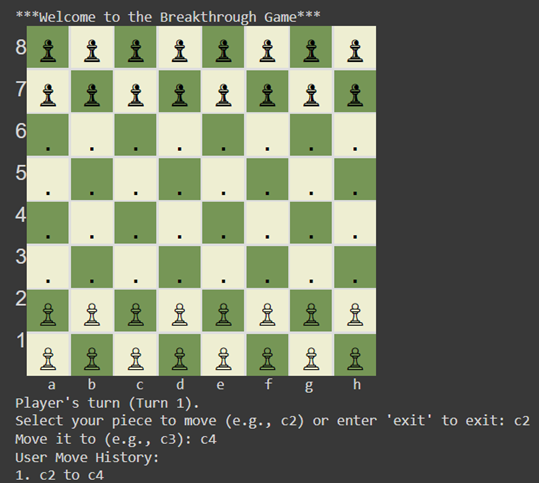

* **Player Turns:** Players take turns making moves. The player moves first, followed by the AI player. On each turn, a player can select one of their pawns and make a legal move based on the specific rules of movement for pawns in Breakthrough.

* **Legal Moves:** Pawns can move forward one square, and on their first move, they have the option to move forward two squares. Pawns capture opponents diagonally. En-passant captures are also possible when a pawn moves two squares forward, and an opponent's pawn could have captured it had it moved only one square.

* **AI Strategy:** The AI player employs a strategy based on predefined rules, including prioritizing moving closer to the player's home row, capturing the player's pawns, blocking the player's progress, utilizing the two-square first move option, considering en passant moves, and focusing on reaching the other end of the board for a quick win in the endgame.

* **Winning the Game:** The game concludes when one of the player's pawns reaches the opposite end of the board. The player whose pawn reaches the last row (for the player) or the first row (for the AI) wins the game. Additionally, the game may end if a player cannot make a valid move, and the opponent is declared the winner.

* **En Passant:** If a pawn moves two squares forward from its starting position and lands adjacent to an opponent's pawn, the opponent has the option to capture the moving pawn as if it had only moved one square.

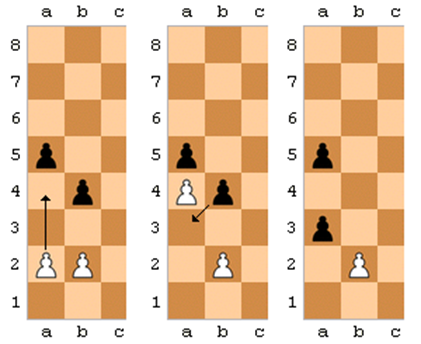

* **Endgame:** The endgame strategy involves a focus on quickly reaching the opponent's end of the board, especially when the number of moves is limited.

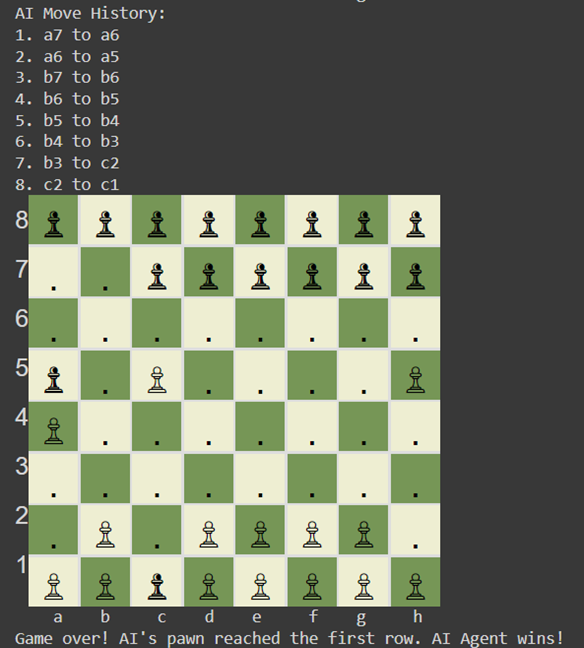

## **Table Driven Approach**

Code: https://onlinegdb.com/BgKdKUxhc




In the Table-Driven approach for the Breakthrough Game AI, we utilize a set of predefined rules and strategies mapped in tables. The agent observes specific percepts and, based on these percepts, selects appropriate actions from the predefined set.

Percepts:

1.	AI's Turn: Perception that it is currently the AI's turn to make a move.
2.	Positions of AI's Pawns Closest to Player's Home Row.
3.	Positions of Player's Pawns Closest to AI's Home Row.
4.	Available Legal Moves for AI: Available legal moves for the AI to make in the current turn, including en passant.
5.	Determining Game Win or Loss.

Actions:
1.	Move pawn closer to opponent's home row - "Move Closer”.
2.	Move to capture opponent's pawn if possible: “Capture”.
4.	Use two-square move option on the first move if available: “TwoSquareMove”.
5.	 Consider en passant move if applicable: “En Passant”.
6.	Focus on reaching the other end of the board quickly for a win": “Endgame Focus”.

Moves:

1.	Forward Movement Only: Move a pawn closer to the opponent's home row in the forward direction only.
2.	Two-Square First Move: Use the two-square move option on the first move if available.
3.	Capture Opponent's Pawns: Move a pawn to capture the opponent's pawns, considering forward and diagonal directions.
4.	En Passant: Special move to capture an opponent's pawn that has moved two squares forward from its starting position.


In [ ]:
# @title Table Driven Approach
import random
import sys
from IPython.display import display, HTML
sys.tracebacklimit = 0

class BreakthroughBoard:
    def __init__(self):
        self.board = [['.' for _ in range(8)] for _ in range(8)]
        self.initialize_board()
        self.current_player = 'P'
        self.ai_piece = 'p'
        self.user_move_history = []
        self.ai_move_history = []
        self.player_moves = 1
        self.en_passant_target = None
        self.strategy_table = {
            "AI's Turn": {
                "Prioritize Moving Closer to Player's Home Row": "Action: Move pawn closer to Player's home row",
                "Evaluate Capturing Player's Pawns": "Action: Move to capture Player's pawn if possible",
                "Exploiting Two-Square First Move": "Action: Use two-square move option on the first move if available",
                "En Passant Move": "Action: Consider en passant move if applicable",
                "Endgame Strategy": "Action: Focus on reaching the other end of the board quickly for a win"
            },
            "Positions of AI's Pawns Closest to Player's Home Row": {
                "AI's Turn": "Action: Move pawn closer to opponent's home row",
            },
            "Positions of Player's Pawns Closest to AI's Home Row": {
                "AI's Turn": "Action: Move to capture opponent's pawn if possible",
            },
            "Available Legal Moves for AI": {
                "Forward Movement Only": "Action: Move to block and capture the player's pawn if it's near rows 4 or 5",
            },
            "Two-Square First Move": {
                "AI's Turn": "Action: Use two-square move option on the first move if available",
            },
            "Current Position of All Pieces": {
                "Whose Turn It Is": "Action: Focus on reaching the other end of the board quickly for a win",
            },
        }

    def initialize_board(self):
        for i in range(8):
            self.board[0][i] = 'P'
            self.board[1][i] = 'P'
            self.board[6][i] = 'p'
            self.board[7][i] = 'p'

    def display_board(self):
        board_html = """
        <!DOCTYPE html>
        <html>
        <head>
        <style>
            .board-container {
                display: flex;
            }
            .board {
                display: grid;
                grid-template-columns: repeat(8, 40px);  /* Reduced width to 30px */
                grid-template-rows: repeat(8, 40px);     /* Reduced height to 30px */
                gap: 2px;
                background-color: #ddd;
            }
            .labels {
                display: grid;
                grid-template-rows: repeat(8, 40px);      /* Reduced height to 30px */
            }
            .label {
                text-align: center;
                vertical-align: middle;
                margin-top:8px;
                font-size: 20px;   /* Adjusted font size for labels */
            }
            .square {
                width: 40px;
                height: 40px;
                background-color: #eeeed2;
                text-align: center;
                vertical-align: middle;
                font-size: 30px;   /* Adjusted font size for pieces */
            }
            .piece {
                color: black;
                line-height: 50px;  /* Center the pawn vertically */
                display: inline-block;  /* Allow vertical centering */
                font-size: 30px;
            }
            .black {
                background-color: #769656;
            }
        </style>
        </head>
        <body>
        <div class="board-container">
            <div class="labels">
                <div class="label">8</div>
                <div class="label">7</div>
                <div class="label">6</div>
                <div class="label">5</div>
                <div class="label">4</div>
                <div class="label">3</div>
                <div class="label">2</div>
                <div class="label">1</div>
            </div>
            <div class="board">
        """
        for row in range(8):
            for col in range(8):
                square_class = "square"
                if (row + col) % 2 == 0:
                    square_class += " black"
                piece = self.board[7 - row][col]
                piece = '♙' if piece == 'P' else '♟' if piece == 'p' else '.'
                board_html += f'<div class="{square_class}"><span class="piece">{piece}</span></div>\n'
        board_html += """
            </div>
        </div>
        </body>
        </html>
        """
        display(HTML(board_html))
        print("    a    b     c    d    e     f    g     h")

    def make_move(self, move_from, move_to):
        while True:
            from_x, from_y = self.square_to_coordinates(move_from)
            to_x, to_y = self.square_to_coordinates(move_to)
            piece = self.board[from_x][from_y]
            if piece == '.':
                print("No piece at that square. Try again.")
            elif not self.is_valid_move(from_x, from_y, to_x, to_y, piece):
                print("Invalid move. Please try again.")
            else:
                break

            if self.current_player == self.ai_piece:
                print("AI made an invalid move. Please debug your AI logic.")
                raise SystemExit(0)

            move_from = input("Select your piece to move (e.g., c2) or enter 'exit' to exit: ").strip()
            move_to = input("Move it to (e.g., c3): ").strip()
            if move_from.lower() == 'exit':
                print("Player exits. Opponent wins!")
                break
        current_pawns, opponent_pawns = self.find_closest_pawns()
        if (to_x, to_y) in current_pawns:
            print(f"Game over! A {self.current_player} pawn reached the opponent's end. {self.current_player} wins!")
            return True
        if piece.islower() and from_x == 4 and to_x == 5 and abs(from_y - to_y) == 1:
            captured_pawn_square = self.coordinates_to_square(4, to_y)
            self.board[4][to_y] = '.'
            print(f"En passant! {self.current_player}'s pawn captures {captured_pawn_square}.")

        self.board[to_x][to_y] = piece
        self.board[from_x][from_y] = '.'
        self.current_player = 'P' if piece.islower() else 'p'
        self.current_piece = piece
        if self.current_player != self.ai_piece:
            self.ai_move_history.append((move_from, move_to))
            self.player_moves += 1
        else:
            self.user_move_history.append((move_from, move_to))
        if self.check_for_win():
            return True
        return False

    def is_valid_move(self, from_x, from_y, to_x, to_y, piece):
        if to_x < 0 or to_x >= 8 or to_y < 0 or to_y >= 8:
            return False

        if piece.islower():
            if from_x - to_x == 1 and from_y == to_y and self.board[to_x][to_y] == '.':
                return True
            if from_x - to_x == 2 and from_y == to_y and from_x == 6 and to_x == 4 and self.board[to_x][to_y] == '.' and self.board[to_x + 1][to_y] == '.':
                return True
            elif from_x - to_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].isupper():
                return True

            if from_x - to_x == 2 and from_y == to_y and from_x == 7 and to_x == 5 and self.board[to_x][to_y] == '.' and self.board[to_x + 1][to_y] == '.':
                return True
            elif from_x - to_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].isupper():
                return True
            if from_x == 4 and to_x == 5 and abs(from_y - to_y) == 1 and self.en_passant_target == self.coordinates_to_square(5, to_y):
                return True

        elif piece.isupper():
            if to_x - from_x == 1 and from_y == to_y and self.board[to_x][to_y] == '.':
                return True
            if to_x - from_x == 2 and from_y == to_y and from_x == 1 and to_x == 3 and self.board[to_x][to_y] == '.' and self.board[to_x - 1][to_y] == '.':
                return True
            elif to_x - from_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].islower():
                return True
            if to_x - from_x == 2 and from_y == to_y and from_x == 0 and to_x == 2 and self.board[to_x][to_y] == '.' and self.board[to_x - 1][to_y] == '.':
                return True
            elif to_x - from_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].islower():
                return True
            if from_x == 3 and to_x == 2 and abs(from_y - to_y) == 1 and self.en_passant_target == self.coordinates_to_square(2, to_y):
                return True
        return False

    def display_en_passant_target(self):
        if self.en_passant_target:
            print(f"En passant target square: {self.en_passant_target}")

    def square_to_coordinates(self, square):
        column, row = square[0], int(square[1])
        return row - 1, ord(column) - ord('a')

    def is_game_over(self):
        player_pawn = 'P'
        opponent_pawn = 'p'
        for row in self.board:
            if player_pawn in row or opponent_pawn in row:
                return False
        print(f"Game over! No {opponent_pawn} pawns left. {self.current_player} wins!")
        return True

    def ai_make_move(self):
        valid_moves = self.get_valid_moves()
        for move in valid_moves:
            move_from_x, move_from_y = self.square_to_coordinates(move[0])
            move_to_x, move_to_y = self.square_to_coordinates(move[1])
            if move_from_x == 6 and move_to_x == 5 and abs(move_from_y - move_to_y) == 1:
                self.make_move(move[0], move[1])
                return
        for i, move in enumerate(valid_moves):
            move_from, move_to = move
            move_from_x, move_from_y = self.square_to_coordinates(move_from)
            move_to_x, move_to_y = self.square_to_coordinates(move_to)
            percepts = {
                "AI's Turn": True if self.current_player == self.ai_piece else False,
                "Positions of AI's Pawns Closest to Opponent's Home Row": [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7),
                                                                           (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)],
                "Positions of Player's Pawns Closest to AI's Home Row": self.find_closest_pawns()[1],
                "Available Legal Moves for AI": valid_moves,
                "Forward Movement Only": True,
                "Two-Square First Move": True if self.player_moves <= 2 and move_from_x in [6, 7] else False,
                "Current Position of All Pieces": self.board,
                "Whose Turn It Is": self.current_player,
            }
            action = self.determine_action(percepts)
            if action == "Action: Move pawn closer to opponent's home row":
                self.make_move(move_from, move_to)
                return
            if action == "Action: Move to capture opponent's pawn if possible":
                target_x, target_y = self.find_best_opponent_pawn_capture(move_to_x, move_to_y)
                if target_x is not None and target_y is not None:
                    target_square = self.coordinates_to_square(target_x, target_y)
                    self.make_move(move_from, target_square)
                    return
            if action == "Action: Move to block and capture the player's pawn if it's near rows 4 or 5":
                player_pawns_near_middle = any((row in [3, 4] for row, _ in self.find_closest_pawns()[1]))
                if player_pawns_near_middle:
                    self.make_move(move_from, move_to)
                    return
            if action == "Action: Use two-square move option on the first move if available":
                if self.player_moves <= 2 and move_from_x in [6, 7]:
                    self.make_move(move_from, move_to)
                    return
            if action == "Action: Consider en passant move if applicable":
                en_passant_target_square = self.check_en_passant(move_to_x, move_to_y)
                if en_passant_target_square:
                    self.make_move(move_from, en_passant_target_square)
                    return
            if action == "Action: Focus on reaching the other end of the board quickly for a win":
                if self.player_moves >= 60:
                    self.make_move(move_from, move_to)
                    return
            move_to_make = move_to
        # if move_to_make is not None:
            self.make_move(move_from, move_to_make)
            break;
        else:
            default_action = "Action: Move pawn closer to opponent's home row"
            print(f"No specific action taken. Using default action: {default_action}")

    def determine_action(self, percepts):
        for percept_key in self.strategy_table:
            if percepts.get(percept_key, False):
                strategy = self.strategy_table[percept_key]
                for strategy_key in strategy:
                    if strategy_key in percepts and percepts[strategy_key]:
                        if percept_key == "Positions of AI's Pawns Closest to Opponent's Home Row":
                            all_closest_pawns_in_position = all(coord in percepts[percept_key] for coord in [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5),
                                                                            (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)])
                            if all_closest_pawns_in_position:
                                return strategy[strategy_key]
                            elif percept_key == "AI's Turn" and all(coord in percepts[percept_key] for coord in [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4),
                                                                (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]):
                                return strategy[strategy_key]
        return "Default Action"

    def find_best_opponent_pawn_capture(self, current_x, current_y):
        opponent_pawns = self.find_closest_pawns()[1]
        best_capture = None
        best_capture_distance = float('inf')
        for opponent_x, opponent_y in opponent_pawns:
            if opponent_y == current_y:
                distance = opponent_x - current_x
                if 0 < distance < best_capture_distance:
                    best_capture = (opponent_x, opponent_y)
                    best_capture_distance = distance
        return best_capture

    def get_valid_moves(self):
        valid_moves = []
        player_piece = 'p'
        move_direction = -1
        for i in range(8):
            for j in range(8):
                if self.board[i][j] == player_piece:
                    if self.is_valid_move(i, j, i + move_direction, j, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j)))
                    if self.is_valid_move(i, j, i + move_direction, j + 1, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j + 1)))
                    if self.is_valid_move(i, j, i + move_direction, j - 1, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j - 1)))
        return valid_moves

    def coordinates_to_square(self, x, y):
        column = chr(y + ord('a'))
        row = str(x + 1)
        return column + row

    def check_for_win(self):
        for col in range(8):
            if self.board[7][col] == 'P':
                self.display_user_move_history()
                print(f"Game over! A player's pawn reached the last row. Player wins!")
                raise SystemExit(0)
                return True
        for col in range(8):
            if self.board[0][col] == 'p':
                self.display_ai_move_history()
                print(f"Game over! AI's pawn reached the first row. AI Agent wins!")
                raise SystemExit(0)
                return True
        return False

    def find_closest_pawns(self):
        current_home_row = 0
        opponent_home_row = 7
        current_pawns = []
        opponent_pawns = []
        for row in range(8):
            for col in range(8):
                piece = self.board[row][col]
                if piece == 'P' and row == current_home_row:
                    current_pawns.append((row, col))
                elif piece == 'p' and row == opponent_home_row:
                    opponent_pawns.append((row, col))
        return current_pawns, opponent_pawns

    def display_user_move_history(self):
        print("User Move History:")
        for i, move in enumerate(self.user_move_history, start=1):
            move_from, move_to = move
            print(f"{i}. {move_from} to {move_to}")

    def display_ai_move_history(self):
        print("AI Move History:")
        for i, move in enumerate(self.ai_move_history, start=1):
            move_from, move_to = move
            print(f"{i}. {move_from} to {move_to}")

    def is_valid_input(self, move):
        if len(move) != 2:
            return False
        column, row = move[0], move[1]
        if not column.isalpha() or not row.isdigit():
            return False
        column = column.lower()
        if column not in 'abcdefgh' or row not in '12345678':
            return False
        return True

    def play_game(self):
        print("****Welcome to the Breakthrough Game****")
        ai_turn = False
        while not self.is_game_over():
            self.display_board()
            if ai_turn:
                self.ai_make_move()
                self.display_ai_move_history()
            else:
                print(f"Player's turn (Turn {self.player_moves}).")
                while True:
                    move_from = input("Select your piece to move (e.g., c2) or enter 'exit' to exit: ").strip()
                    if move_from.lower() == 'exit':
                        print("Player exits. Opponent wins!")
                        break
                    if self.is_valid_input(move_from):
                        break
                    else:
                        print("Invalid input. Please enter a valid move.")
                if move_from.lower() == 'exit':
                    break
                while True:
                    move_to = input("Move it to (e.g., c3): ").strip()
                    if self.is_valid_input(move_to):
                        break
                    else:
                        print("Invalid input. Please enter a valid move.")
                self.make_move(move_from, move_to)
                self.display_user_move_history()
            ai_turn = not ai_turn
        if ai_turn:
            self.display_ai_move_history()
        else:
            self.display_user_move_history()
        self.display_board()
        if self.is_game_over():
            return

if __name__ == "__main__":
    breakthrough_board = BreakthroughBoard()
    breakthrough_board.play_game()

****Welcome to the Breakthrough Game****


    a    b     c    d    e     f    g     h
Player's turn (Turn 1).
Invalid input. Please enter a valid move.
User Move History:
1. c2 to c4


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6


    a    b     c    d    e     f    g     h
Player's turn (Turn 2).


## **Q-Learning** - Intelligent Agent

Code: https://onlinegdb.com/XOIkT4nk7

Refernce: https://en.wikipedia.org/wiki/Q-learning


The Breakthrough Game AI becomes intelligent through a reinforcement learning approach. The agent learns from experience and adjusts its strategy based on the observed outcomes of its moves. we used the Q-Learning algorithm to solve the problem. The following steps outline the application of Q-learning to the Breakthrough game:

The Breakthrough agent implicitly discretizes the state space by representing the game board as a string. This representation allows the agent to effectively manage and learn from different game states.

Bellman Equation for Q-Learning:

Q(s,a) = (1-α) * Q(s,a) + α * [r + γ * max(a^|) Q(s^|, a)]

Where

s is the state

a is the action

s^| is the next state

α is the Learning rate.

r is the Immediate reward.

γ is the Discount factor.


In [ ]:
# @title Q- Learning
import numpy as np
import sys
from IPython.display import display, HTML
sys.tracebacklimit = 0

class BreakthroughBoard:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1):
        self.board = [['.' for _ in range(8)] for _ in range(8)]
        self.initialize_board()
        self.current_player = 'P'
        self.ai_piece = 'p'
        self.user_move_history = []
        self.ai_move_history = []
        self.rewards_history = []
        self.rewards_sum = 0.0
        self.player_moves = 1
        self.en_passant_target = None
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.q_table = {}
        self.strategy_table = {
            "AI's Turn": {
                "Prioritize Moving Closer to Player's Home Row": "Action: Move pawn closer to Player's home row",
                "Evaluate Capturing Player's Pawns": "Action: Move to capture Player's pawn if possible",
                "Blocking Player's Progress": "Action: Move to block and capture the Player's pawn if it's near rows 2 or 3",
                "Exploiting Two-Square First Move": "Action: Use two-square move option on the first move if available",
                "En Passant Move": "Action: Consider en passant move if applicable",
                "Endgame Strategy": "Action: Focus on reaching the other end of the board quickly for a win"
            },
            "Positions of AI's Pawns Closest to Player's Home Row": {
                "AI's Turn": "Action: Move pawn closer to opponent's home row",
            },
            "Positions of Player's Pawns Closest to AI's Home Row": {
                "AI's Turn": "Action: Move to capture opponent's pawn if possible",
            },
            "Available Legal Moves for AI": {
                "Forward Movement Only": "Action: Move to block and capture the player's pawn if it's near rows 4 or 5",
            },
            "Two-Square First Move": {
                "AI's Turn": "Action: Use two-square move option on the first move if available",
            },
            "Current Position of All Pieces": {
                "Whose Turn It Is": "Action: Focus on reaching the other end of the board quickly for a win",
            },
        }

    def initialize_board(self):
        for i in range(8):
            self.board[0][i] = 'P'
            self.board[1][i] = 'P'
            self.board[6][i] = 'p'
            self.board[7][i] = 'p'

    def display_board(self):
        board_html = """
        <!DOCTYPE html>
        <html>
        <head>
        <style>
            .board-container {
                display: flex;
            }
            .board {
                display: grid;
                grid-template-columns: repeat(8, 40px);  /* Reduced width to 30px */
                grid-template-rows: repeat(8, 40px);     /* Reduced height to 30px */
                gap: 2px;
                background-color: #ddd;
            }
            .labels {
                display: grid;
                grid-template-rows: repeat(8, 40px);      /* Reduced height to 30px */
            }
            .label {
                text-align: center;
                vertical-align: middle;
                margin-top:8px;
                font-size: 20px;   /* Adjusted font size for labels */
            }
            .square {
                width: 40px;
                height: 40px;
                background-color: #eeeed2;
                text-align: center;
                vertical-align: middle;
                font-size: 30px;   /* Adjusted font size for pieces */
            }
            .piece {
                color: black;
                line-height: 50px;  /* Center the pawn vertically */
                display: inline-block;  /* Allow vertical centering */
                font-size: 30px;
            }
            .black {
                background-color: #769656;
            }
        </style>
        </head>
        <body>
        <div class="board-container">
            <div class="labels">
                <div class="label">8</div>
                <div class="label">7</div>
                <div class="label">6</div>
                <div class="label">5</div>
                <div class="label">4</div>
                <div class="label">3</div>
                <div class="label">2</div>
                <div class="label">1</div>
            </div>
            <div class="board">
        """
        for row in range(8):
            for col in range(8):
                square_class = "square"
                if (row + col) % 2 == 0:
                    square_class += " black"
                piece = self.board[7 - row][col]
                piece = '♙' if piece == 'P' else '♟' if piece == 'p' else '.'
                board_html += f'<div class="{square_class}"><span class="piece">{piece}</span></div>\n'
        board_html += """
            </div>
        </div>
        </body>
        </html>
        """
        display(HTML(board_html))
        print("    a    b     c    d    e     f    g     h")

    def make_move(self, move_from, move_to):
        while True:
            from_x, from_y = self.square_to_coordinates(move_from)
            to_x, to_y = self.square_to_coordinates(move_to)
            piece = self.board[from_x][from_y]
            if piece == '.':
                print("No piece at that square. Try again.")
            elif not self.is_valid_move(from_x, from_y, to_x, to_y, piece):
                print("Invalid move. Please try again.")
            else:
                break

            if self.current_player == self.ai_piece:
                print("AI made an invalid move. Please debug your AI logic.")
                raise SystemExit(0)

            move_from = input("Select your piece to move (e.g., c2) or enter 'exit' to exit: ").strip()
            move_to = input("Move it to (e.g., c3): ").strip()
            if move_from.lower() == 'exit':
                print("Player exits. Opponent wins!")
                break

        move_success = self.update_board_and_check_win(from_x, from_y, to_x, to_y, piece)
        if move_success:
            self.update_q_values(from_x, from_y, to_x, to_y, piece)

        self.current_player = 'P' if piece.islower() else 'p'
        self.current_piece = piece
        if self.current_player != self.ai_piece:
            self.ai_move_history.append((move_from, move_to))
            self.player_moves += 1
        else:
            self.user_move_history.append((move_from, move_to))
        if self.check_for_win():
            return True
        return False

    def update_board_and_check_win(self, from_x, from_y, to_x, to_y, piece):
        if piece.islower() and from_x == 4 and to_x == 5 and abs(from_y - to_y) == 1:
            captured_pawn_square = self.coordinates_to_square(4, to_y)
            self.board[4][to_y] = '.'
            print(f"En passant! {self.current_player}'s pawn captures {captured_pawn_square}")
        elif self.board[to_x][to_y].isupper():

            captured_pawn_square = self.coordinates_to_square(to_x, to_y)
            print("Action: Move to capture opponent's pawn if possible")
            print(f"AI Agent Captured {captured_pawn_square} Player's pawn")
            reward = 0.5
            self.update_q_values(from_x, from_y, to_x, to_y, piece, reward)
            print(f"AI was rewarded with {reward} for capturing a player's pawn.")
        self.board[to_x][to_y] = piece
        self.board[from_x][from_y] = '.'
        current_pawns, opponent_pawns = self.find_closest_pawns()
        if (to_x, to_y) in current_pawns:
            print(f"Game over! A {self.current_player} pawn reached the opponent's end. {self.current_player} wins!")
            return True
        self.display_en_passant_target()
        return False

    def update_q_values(self, from_x, from_y, to_x, to_y, piece, reward=None):
        state = self.get_state_representation()
        action = (self.coordinates_to_square(from_x, from_y), self.coordinates_to_square(to_x, to_y))
        q_value = self.get_q_value(state, action)
        next_state = self.get_state_representation()
        next_max_q = max(self.get_q_values(next_state).values())
        if reward is not None:
            updated_q_value = (1 - self.learning_rate) * q_value + \
                              self.learning_rate * (reward + self.discount_factor * next_max_q)
        else:
            updated_q_value = (1 - self.learning_rate) * q_value + \
                              self.learning_rate * (self.discount_factor * next_max_q)
        self.update_q_value(state, action, updated_q_value)
        if reward is not None:
            self.rewards_history.append((action, reward))
            self.rewards_sum += reward

    def display_rewards_history(self):
        print("Rewards History:")
        for i, (action, reward) in enumerate(self.rewards_history, start=1):
            print(f"{i}. Move: {action[1]}, Action: {action[0]}, Reward: {reward}")
        print(f"Total Rewards: {self.rewards_sum}")

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def get_q_values(self, state):
        return {action: self.get_q_value(state, action) for action in self.get_valid_moves()}

    def update_q_value(self, state, action, value):
        self.q_table[(state, action)] = value

    def is_valid_move(self, from_x, from_y, to_x, to_y, piece):
        if to_x < 0 or to_x >= 8 or to_y < 0 or to_y >= 8:
            return False

        if piece.islower():
            if from_x - to_x == 1 and from_y == to_y and self.board[to_x][to_y] == '.':
                return True
            if from_x - to_x == 2 and from_y == to_y and from_x == 6 and to_x == 4 and self.board[to_x][to_y] == '.' and self.board[to_x + 1][to_y] == '.':
                return True
            elif from_x - to_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].isupper():
                return True
            if from_x - to_x == 2 and from_y == to_y and from_x == 7 and to_x == 5 and self.board[to_x][to_y] == '.' and self.board[to_x + 1][to_y] == '.':
                return True
            elif from_x - to_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].isupper():
                return True
            if from_x == 4 and to_x == 5 and abs(from_y - to_y) == 1 and self.en_passant_target == self.coordinates_to_square(5, to_y):
                return True

        elif piece.isupper():
            if to_x - from_x == 1 and from_y == to_y and self.board[to_x][to_y] == '.':
                return True
            if to_x - from_x == 2 and from_y == to_y and from_x == 1 and to_x == 3 and self.board[to_x][to_y] == '.' and self.board[to_x - 1][to_y] == '.':
                return True
            elif to_x - from_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].islower():
                return True
            if to_x - from_x == 2 and from_y == to_y and from_x == 0 and to_x == 2 and self.board[to_x][to_y] == '.' and self.board[to_x - 1][to_y] == '.':
                return True
            elif to_x - from_x == 1 and abs(from_y - to_y) == 1 and self.board[to_x][to_y].islower():
                return True
            if from_x == 3 and to_x == 2 and abs(from_y - to_y) == 1 and self.en_passant_target == self.coordinates_to_square(2, to_y):
                return True
        return False

    def display_en_passant_target(self):
        if self.en_passant_target:
            print(f"En passant target square: {self.en_passant_target}")

    def square_to_coordinates(self, square):
        column, row = square[0], int(square[1])
        return row - 1, ord(column) - ord('a')

    def is_game_over(self):
        player_pawn = 'P'
        opponent_pawn = 'p'
        for row in self.board:
            if player_pawn in row or opponent_pawn in row:
                return False
        print(f"Game over! No {opponent_pawn} pawns left. {self.current_player} wins!")
        return True

    def get_state_representation(self):
        state = ""
        for row in self.board:
            state += "".join(row)
        return state

    def calculate_reward(self):
        current_pawns, opponent_pawns = self.find_closest_pawns()
        last_row = 7 if self.current_player == 'P' else 0
        for pawn in current_pawns:
            if pawn[0] == last_row:
                return 1.0
        captured_pawns = set(opponent_pawns) - set(self.find_closest_pawns()[1])
        return len(captured_pawns) * 0.5

    def ai_make_move(self):
        legal_moves = self.get_valid_moves()
        current_state = self.get_state_representation()
        for move in legal_moves:
            move_from_x, move_from_y = self.square_to_coordinates(move[0])
            move_to_x, move_to_y = self.square_to_coordinates(move[1])
            if move_from_x == 6 and move_to_x == 5 and abs(move_from_y - move_to_y) == 1:
                self.make_move(move[0], move[1])
                return
        q_values = {move: self.get_q_value(current_state, move) for move in legal_moves}
        move_to_make = max(q_values, key=q_values.get)
        move_from_x, move_from_y = self.square_to_coordinates(move_to_make[0])
        move_to_x, move_to_y = self.square_to_coordinates(move_to_make[1])

        percepts = {
            "AI's Turn": True,
            "Positions of AI's Pawns Closest to Opponent's Home Row": [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7),
                                                                      (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)],
            "Positions of Player's Pawns Closest to AI's Home Row": self.find_closest_pawns()[1],
            "Available Legal Moves for AI": legal_moves,
            "Forward Movement Only": True,
            "Two-Square First Move": True if self.player_moves <= 2 and move_from_x in [6, 7] else False,
            "Current Position of All Pieces": self.board,
            "Whose Turn It Is": self.current_player,
        }

        action = self.determine_action(percepts)
        if action == "Action: Move pawn closer to opponent's home row":
            self.make_move(move_to_make[0], move_to_make[1])
        elif action == "Action: Move to capture opponent's pawn if possible":
            target_x, target_y = self.find_best_opponent_pawn_capture(move_to_x, move_to_y)
            if target_x is not None and target_y is not None:
                target_square = self.coordinates_to_square(target_x, target_y)
                self.make_move(move_to_make[0], target_square)
        elif action == "Action: Move to block and capture the player's pawn if it's near rows 4 or 5":
            player_pawns_near_middle = any((row in [3, 4] for row, _ in self.find_closest_pawns()[1]))
            if player_pawns_near_middle:
                self.make_move(move_to_make[0], move_to_make[1])
        elif action == "Action: Use two-square move option on the first move if available":
            if self.player_moves <= 2 and move_from_x in [6, 7]:
                self.make_move(move_to_make[0], move_to_make[1])
        elif action == "Action: Consider en passant move if applicable":
            en_passant_target_square = self.check_en_passant(move_to_x, move_to_y)
            if en_passant_target_square:
                self.make_move(move_to_make[0], en_passant_target_square)
        elif action == "Action: Focus on reaching the other end of the board quickly for a win":
            if self.player_moves >= 60:
                self.make_move(move_to_make[0], move_to_make[1])
        else:
            self.make_move(move_to_make[0], move_to_make[1])

    def determine_action(self, percepts):
        if np.random.rand() < self.exploration_prob:
            return "Explore"
        ai_turn = percepts["AI's Turn"]
        player_pawns_near_middle = any((row in [3, 4] for row, _ in percepts["Positions of Player's Pawns Closest to AI's Home Row"]))
        player_pawns_near_end = any((row in [6, 7] for row, _ in percepts["Positions of Player's Pawns Closest to AI's Home Row"]))
        available_legal_moves = percepts["Available Legal Moves for AI"]
        for move in available_legal_moves:
            move_from_x, move_from_y = self.square_to_coordinates(move[0])
            move_to_x, move_to_y = self.square_to_coordinates(move[1])
            if move_from_x == 6 and move_to_x == 5 and abs(move_from_y - move_to_y) == 1:
                return "Action: Move to capture opponent's pawn if possible"
        if player_pawns_near_middle:
            return "Action: Move to block and capture the player's pawn if it's near rows 4 or 5"
        elif player_pawns_near_end:
            if available_legal_moves:
                best_capture = self.find_best_opponent_pawn_capture(available_legal_moves[0][0], available_legal_moves[0][1])
                if best_capture:
                    return "Action: Move to capture opponent's pawn if possible"
        elif self.player_moves >= 60:
            return "Action: Focus on reaching the other end of the board quickly for a win"
        current_state = self.get_state_representation()
        legal_moves = self.get_valid_moves()
        q_values = {move: self.get_q_value(current_state, move) for move in legal_moves}
        best_move = max(q_values, key=q_values.get)
        action_mapping = {
            "Action: Move pawn closer to opponent's home row": "MoveCloser",
            "Action: Move to capture opponent's pawn if possible": "Capture",
            "Action: Move to block and capture the player's pawn if it's near rows 4 or 5": "BlockCapture",
            "Action: Use two-square move option on the first move if available": "TwoSquareMove",
            "Action: Consider en passant move if applicable": "EnPassant",
            "Action: Focus on reaching the other end of the board quickly for a win": "EndgameFocus",
        }
        return action_mapping.get(best_move, "Default Action")

    def find_best_opponent_pawn_capture(self, current_x, current_y):
        opponent_pawns = self.find_closest_pawns()[1]
        best_capture = None
        best_capture_distance = float('inf')
        for opponent_x, opponent_y in opponent_pawns:
            if opponent_y == current_y:
                distance = opponent_x - current_x
                if 0 < distance < best_capture_distance:
                    best_capture = (opponent_x, opponent_y)
                    best_capture_distance = distance
        return best_capture

    def get_valid_moves(self):
        valid_moves = []
        player_piece = 'p'
        move_direction = -1
        for i in range(8):
            for j in range(8):
                if self.board[i][j] == player_piece:
                    if self.is_valid_move(i, j, i + move_direction, j, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j)))
                    if self.is_valid_move(i, j, i + move_direction, j + 1, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j + 1)))
                    if self.is_valid_move(i, j, i + move_direction, j - 1, player_piece):
                        valid_moves.append((self.coordinates_to_square(i, j), self.coordinates_to_square(i + move_direction, j - 1)))
        return valid_moves

    def coordinates_to_square(self, x, y):
        column = chr(y + ord('a'))
        row = str(x + 1)
        return column + row

    def check_for_win(self):
        for col in range(8):
            if self.board[7][col] == 'P':
                self.display_user_move_history()
                self.display_board()
                state = self.get_state_representation()
                action = None
                reward = -1.0
                print(f"AI was rewarded with {reward} because Player's pawn reached last row and AI Agent lost.")
                self.update_q_value(state, action, reward)
                self.display_rewards_history()
                print(f"Game over! A player's pawn reached the last row. Player wins!")
                raise SystemExit(0)
                return True
        for col in range(8):
            if self.board[0][col] == 'p':
                self.display_ai_move_history()
                self.display_board()
                state = self.get_state_representation()
                action = None
                reward = 1.0
                print("Action: Focus on reaching the other end of the board quickly for a win")
                print(f"AI was rewarded with {reward} for reaching the opponent's end and winning the game.")
                self.update_q_value(state, action, reward)
                self.display_rewards_history()
                print(f"Game over! AI's pawn reached the first row. AI Agent wins!")
                raise SystemExit(0)
                return True
        return False

    def find_closest_pawns(self):
        current_home_row = 0
        opponent_home_row = 7
        current_pawns = []
        opponent_pawns = []
        for row in range(8):
            for col in range(8):
                piece = self.board[row][col]
                if piece == 'P' and row == current_home_row:
                    current_pawns.append((row, col))
                elif piece == 'p' and row == opponent_home_row:
                    opponent_pawns.append((row, col))
        return current_pawns, opponent_pawns

    def display_user_move_history(self):
        print("User Move History:")
        for i, move in enumerate(self.user_move_history, start=1):
            move_from, move_to = move
            print(f"{i}. {move_from} to {move_to}")

    def display_ai_move_history(self):
        print("AI Move History:")
        for i, move in enumerate(self.ai_move_history, start=1):
            move_from, move_to = move
            print(f"{i}. {move_from} to {move_to}")

    def is_valid_input(self, move):
        if len(move) != 2:
            return False
        column, row = move[0], move[1]
        if not column.isalpha() or not row.isdigit():
            return False
        column = column.lower()
        if column not in 'abcdefgh' or row not in '12345678':
            return False
        return True

    def play_game(self):
        print("***Welcome to the Breakthrough Game***")
        ai_turn = False
        while not self.is_game_over():
            self.display_board()
            if ai_turn:
                self.ai_make_move()
                self.display_ai_move_history()
                self.display_rewards_history()
            else:
                print(f"Player's turn (Turn {self.player_moves}).")
                while True:
                    move_from = input("Select your piece to move (e.g., c2) or enter 'exit' to exit: ").strip()
                    if move_from.lower() == 'exit':
                        print("Player exits. Opponent wins!")
                        break
                    if self.is_valid_input(move_from):
                        break
                    else:
                        print("Invalid input. Please enter a valid move.")
                if move_from.lower() == 'exit':
                    break
                while True:
                    move_to = input("Move it to (e.g., c3): ").strip()
                    if self.is_valid_input(move_to):
                        break
                    else:
                        print("Invalid input. Please enter a valid move.")
                self.make_move(move_from, move_to)
                self.display_user_move_history()
            ai_turn = not ai_turn
        if ai_turn:
            self.display_ai_move_history()
            self.display_rewards_history()
        else:
            self.display_user_move_history()
        self.display_board()
        if self.is_game_over():
            return

if __name__ == "__main__":
    breakthrough_board = BreakthroughBoard(learning_rate=0.2, discount_factor=0.8, exploration_prob=0.2)
    breakthrough_board.play_game()

***Welcome to the Breakthrough Game***


    a    b     c    d    e     f    g     h
Player's turn (Turn 1).
Select your piece to move (e.g., c2) or enter 'exit' to exit: cr
Invalid input. Please enter a valid move.
Select your piece to move (e.g., c2) or enter 'exit' to exit: c2
Move it to (e.g., c3): c6
Invalid move. Please try again.
Select your piece to move (e.g., c2) or enter 'exit' to exit: c2
Move it to (e.g., c3): c4
User Move History:
1. c2 to c4


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6
Rewards History:
Total Rewards: 0.0


    a    b     c    d    e     f    g     h
Player's turn (Turn 2).
Select your piece to move (e.g., c2) or enter 'exit' to exit: c4
Move it to (e.g., c3): c5
User Move History:
1. c2 to c4
2. c4 to c5


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6
2. a6 to a5
Rewards History:
Total Rewards: 0.0


    a    b     c    d    e     f    g     h
Player's turn (Turn 3).
Select your piece to move (e.g., c2) or enter 'exit' to exit: c5
Move it to (e.g., c3): c6
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6


    a    b     c    d    e     f    g     h
Action: Move to capture opponent's pawn if possible
AI Agent Captured c6 Player's pawn
AI was rewarded with 0.5 for capturing a player's pawn.
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
Total Rewards: 0.5


    a    b     c    d    e     f    g     h
Player's turn (Turn 4).
Select your piece to move (e.g., c2) or enter 'exit' to exit: a2
Move it to (e.g., c3): a4
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6
4. a2 to a4


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
4. c6 to c5
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
Total Rewards: 0.5


    a    b     c    d    e     f    g     h
Player's turn (Turn 5).
Select your piece to move (e.g., c2) or enter 'exit' to exit: b2
Move it to (e.g., c3): b4
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6
4. a2 to a4
5. b2 to b4


    a    b     c    d    e     f    g     h
Action: Move to capture opponent's pawn if possible
AI Agent Captured b4 Player's pawn
AI was rewarded with 0.5 for capturing a player's pawn.
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
4. c6 to c5
5. a5 to b4
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
2. Move: b4, Action: a5, Reward: 0.5
Total Rewards: 1.0


    a    b     c    d    e     f    g     h
Player's turn (Turn 6).
Select your piece to move (e.g., c2) or enter 'exit' to exit: f2
Move it to (e.g., c3): f3
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6
4. a2 to a4
5. b2 to b4
6. f2 to f3


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
4. c6 to c5
5. a5 to b4
6. b4 to b3
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
2. Move: b4, Action: a5, Reward: 0.5
Total Rewards: 1.0


    a    b     c    d    e     f    g     h
Player's turn (Turn 7).
Select your piece to move (e.g., c2) or enter 'exit' to exit: f3
Move it to (e.g., c3): f4
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6
4. a2 to a4
5. b2 to b4
6. f2 to f3
7. f3 to f4


    a    b     c    d    e     f    g     h
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
4. c6 to c5
5. a5 to b4
6. b4 to b3
7. b3 to b2
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
2. Move: b4, Action: a5, Reward: 0.5
Total Rewards: 1.0


    a    b     c    d    e     f    g     h
Player's turn (Turn 8).
Select your piece to move (e.g., c2) or enter 'exit' to exit: f4
Move it to (e.g., c3): f5
User Move History:
1. c2 to c4
2. c4 to c5
3. c5 to c6
4. a2 to a4
5. b2 to b4
6. f2 to f3
7. f3 to f4
8. f4 to f5


    a    b     c    d    e     f    g     h
Action: Move to capture opponent's pawn if possible
AI Agent Captured c1 Player's pawn
AI was rewarded with 0.5 for capturing a player's pawn.
AI Move History:
1. a7 to a6
2. a6 to a5
3. b7 to c6
4. c6 to c5
5. a5 to b4
6. b4 to b3
7. b3 to b2
8. b2 to c1


    a    b     c    d    e     f    g     h
Action: Focus on reaching the other end of the board quickly for a win
AI was rewarded with 1.0 for reaching the opponent's end and winning the game.
Rewards History:
1. Move: c6, Action: b7, Reward: 0.5
2. Move: b4, Action: a5, Reward: 0.5
3. Move: c1, Action: b2, Reward: 0.5
Total Rewards: 1.5
Game over! AI's pawn reached the first row. AI Agent wins!


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
